##### Projet CO2 par Polina, Vincent, Denis

Ce notebook:  
entraine un modèle pour prédiction

Prend en entrée les fichiers:  
    (processed)/*train* et *test*: Fichiers des données séparées en train+test  
  
Fournit en sortie les fichiers:  
     (processed)/X_test_scaled.csv, X_train_scaled.csv, y_test.csv, y_train.csv : les données scalées et donc forcément préalablement séparées en jeux de train/test.  
     (models)/*.pkl , optionnellement  


# Initialisations, librairies

In [1]:
from init_notebook import *
from common_co2 import load_our_data

In [2]:
# chargement de libraires

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('future.no_silent_downcasting', True)
              

# Random Forest

In [3]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data()

## &nbsp;&nbsp;&nbsp;&nbsp;Grid search

In [ ]:
# On recherche les performances sur une grille de paramètres, avec gridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialisation du modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Définir une grille de recherche pour optimiser le modèle
param_grid = {
    'n_estimators': [60, 100, 150, 300],   
    'max_depth': [None,10,20],       
    'min_samples_split': [5, 10, 12, 20, 50],   
    'min_samples_leaf': [1,4]     
}

# Configuration de la recherche de grille avec validation croisée
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # x-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Ajuster le modèle sur les données
grid_search_rf.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
best_rf = grid_search_rf.best_estimator_
print("Meilleurs paramètres :", grid_search_rf.best_params_)

# Prédictions sur les données d'entraînement
y_pred_rf = best_rf.predict(X_train_scaled)

# Calcul de MSE et R²
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)
print(f"\nErreur quadratique moyenne (MSE) sur jeu d'entraînement : {mse_rf}")
print(f"Score R2 sur jeu d'entraînement : {r2_rf}\n")

# Prédictions sur les données de test
y_pred_rf_tst = best_rf.predict(X_test_scaled)

# Calcul de MSE et R² sur test
mse_rf_tst = mean_squared_error(y_test, y_pred_rf_tst)
r2_rf_tst = r2_score(y_test, y_pred_rf_tst)
print(f"Erreur quadratique moyenne (MSE) test: {mse_rf_tst}")
print(f"Score R2 test: {r2_rf_tst}")


Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Erreur quadratique moyenne (MSE) : 23.601756123865915
Score R2 : 0.9928693390143274
Erreur quadratique moyenne (MSE) test: 49.19363208789086
Score R2 test: 0.9852788530359524


Le résultat ci-dessus, s'il contient min_sample_leaf == 1 dans les meilleurs paramètres, est un résultat excellent en terme de score, mais ne doit pas être retenu pour notre modèle, car il est trop ajusté aux véhicules existants.

In [28]:
# Nous pouvons afficher les performances de chaque combinaison de paramètres scrutée.
results = grid_search_rf.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print("mean_score", f"{mean_score:.4f}", params)

mean_score -51.1677 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
mean_score -51.1151 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 130}
mean_score -51.0385 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 160}
mean_score -50.9839 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}
mean_score -51.0559 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}
mean_score -51.0180 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 130}
mean_score -50.9609 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 160}
mean_score -50.8946 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
mean_score -51.5594 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 100}
mean_score -51.4659 {'max_d

In [ ]:
# %matplotlib inline
# contraire de %matplotlib notebook, qui ne fonctionne pas dans jupyterlab


## &nbsp;&nbsp;&nbsp;&nbsp;Visualisation des résultats de la recherche de grille

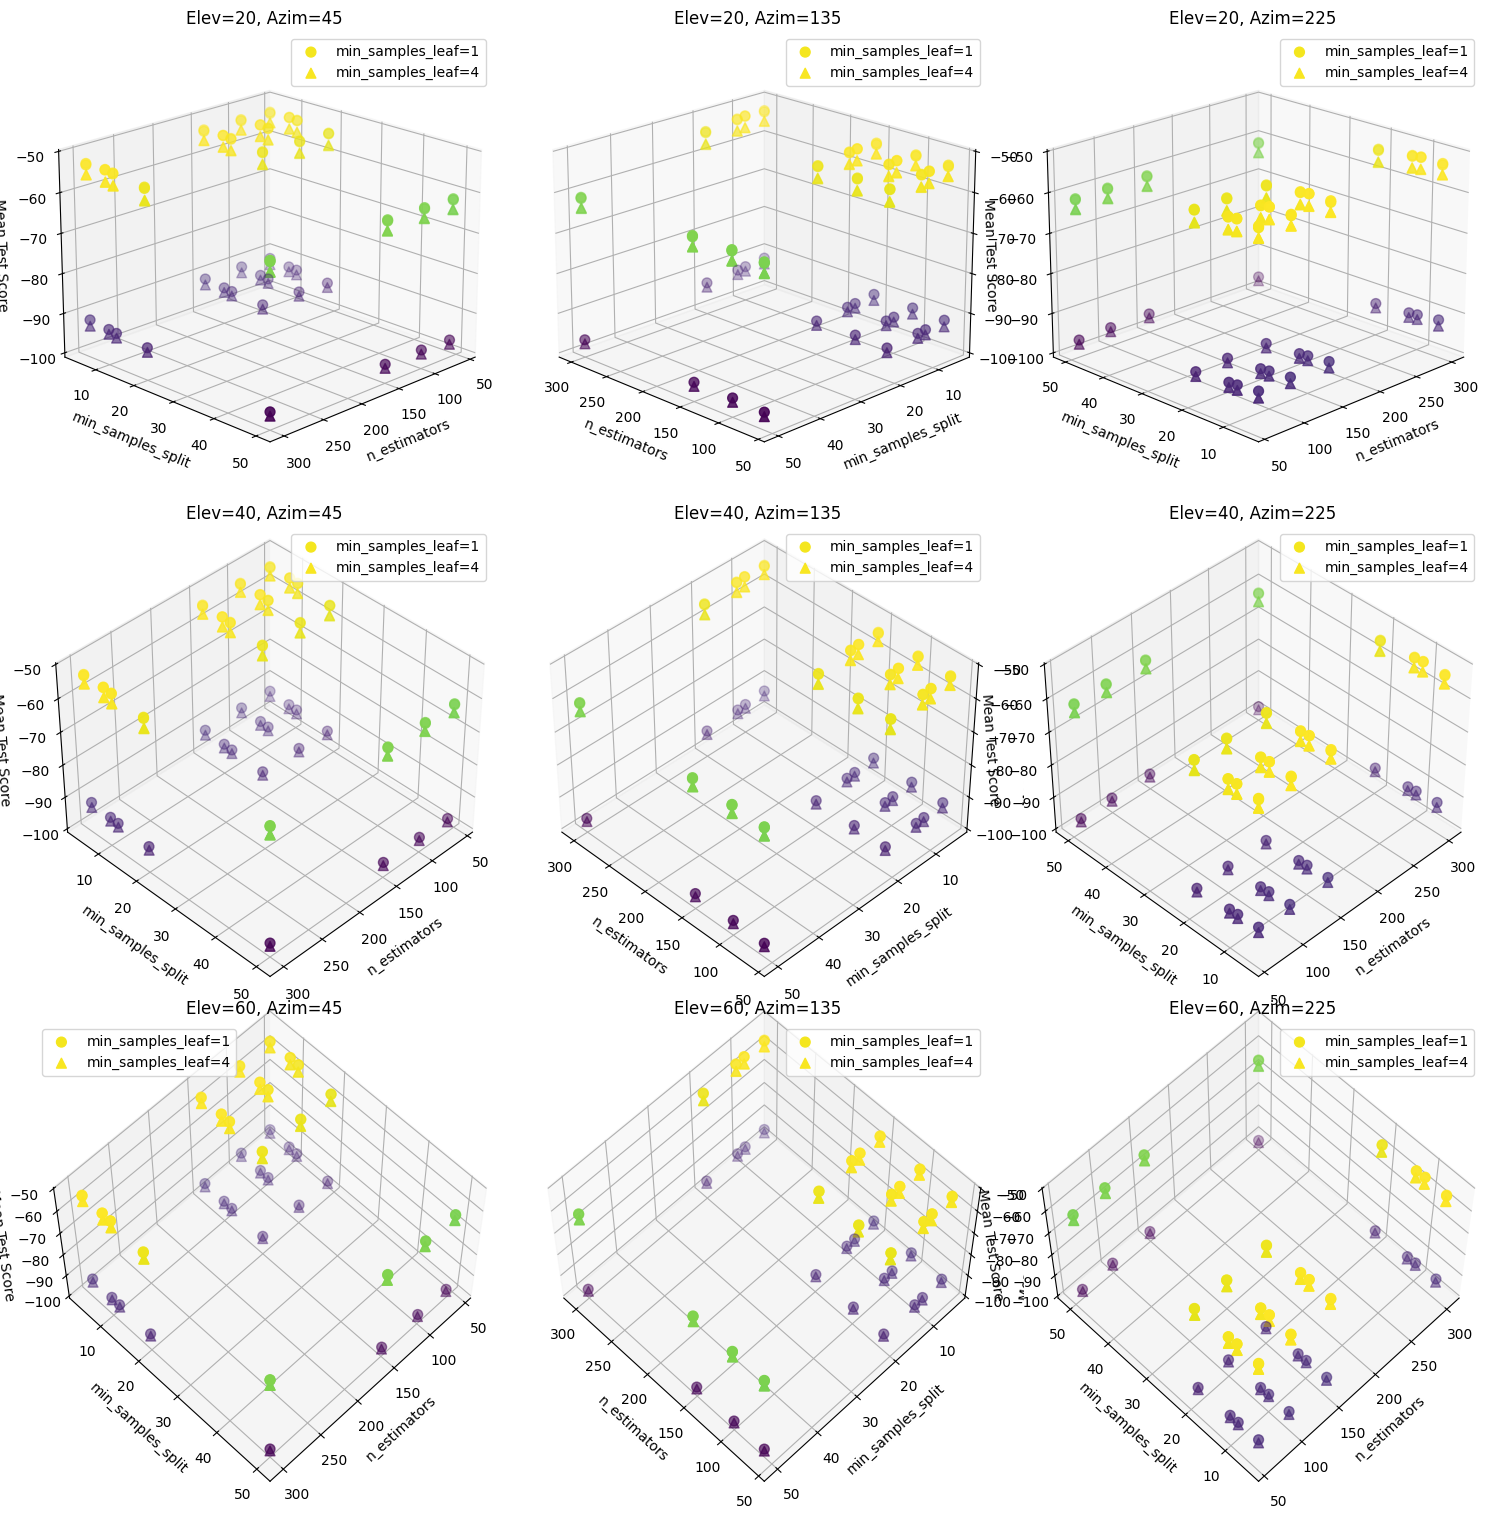

In [ ]:
# Visualisation en notebook pour comprendre les valeurs d'hyperparamètres qui favorisent les meilleurs résultats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Exemple de données
n_estimators = [params["n_estimators"] for params in results["params"]]
min_samples_split = [params["min_samples_split"] for params in results["params"]]
min_samples_leaf = [params["min_samples_leaf"] for params in results["params"]]
mean_scores = results["mean_test_score"]

n_estimators = np.array(n_estimators)
min_samples_split = np.array(min_samples_split)
min_samples_leaf = np.array(min_samples_leaf)
mean_scores = np.array(mean_scores)

# Mapper les formes aux valeurs de min_samples_leaf
shapes = {1: "o", 4: "^"}  # Cercles pour 1, Triangles pour 4

# Angles pour les différentes vues
angles = [
    (20, 45), (20, 135), (20, 225),
    (40, 45), (40, 135), (40, 225),
    (60, 45), (60, 135), (60, 225)
]

# Créer une grille de 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})

# Tracer les graphiques pour chaque angle
for ax, (elev, azim) in zip(axes.ravel(), angles):
    for leaf_value in shapes.keys():
        mask = min_samples_leaf == leaf_value  # Filtrer pour chaque valeur de min_samples_leaf
        ax.scatter(
            n_estimators[mask], 
            min_samples_split[mask], 
            mean_scores[mask], 
            c=mean_scores[mask], 
            cmap='viridis', 
            s=50, 
            marker=shapes[leaf_value], 
            label=f"min_samples_leaf={leaf_value}"
        )
    
    # Configurer l'angle de vue
    ax.view_init(elev=elev, azim=azim)

    # Ajouter des étiquettes et un titre
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("min_samples_split")
    ax.set_zlabel("Mean Test Score")
    ax.set_title(f"Elev={elev}, Azim={azim}")
    ax.legend()

# Ajuster la mise en page
plt.tight_layout()
plt.show()



J'y vois les tendances qui favorisent un score haut (couleur jaune):
- n_estimators haut, mais au delà de 120 c'est peu intéressant
- min_sample_split bas
- min_sample_leaf est mieux à 1 plutot que 4


Nous allons mettre tout ça dans mlflow pour vérifier

## &nbsp;&nbsp;&nbsp;&nbsp;Exploration de paramètres et envoi à mlflow

In [18]:
import mlflow
import mlflow.sklearn
mlflow.autolog(silent=True)  # Active le suivi automatique

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

mlflow.set_experiment("CO2")

# Initialisation du modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Définir une grille de recherche pour optimiser le modèle

""" 
run_name="RF1"
param_grid = {
        'n_estimators': [20, 30, 60],   
        'max_depth': [None],       
        'min_samples_split': [2,6],   
        'min_samples_leaf': [1, 2]     
    }
 """

""" # on tient compte des conclusions du précédent
run_name="RF2"
param_grid = {
        'n_estimators': [20, 40, 60, 100],   
        'max_depth': [None],       
        'min_samples_split': [4,6, 8],   
        'min_samples_leaf': [1]     
    }
 """

"""
run_name="RF3"
param_grid = {
        'n_estimators': [20, 40, 60, 100, 130, 160],   
        'max_depth': [None],       
        'min_samples_split': [8, 12],   
        'min_samples_leaf': [1]     
    }
 """

"""
# maintenant min_sample_split autour de 10 ou 6 et n_estimators hauts (si besoin de avoir pourquoi, voir rapport sur mlflow)
run_name="RF4"
param_grid = {
        'n_estimators': [100, 130, 160, 200],   
        'max_depth': [None],       
        'min_samples_split': [6, 8, 12],   
        'min_samples_leaf': [1]     
    }
"""

# On s'interdit min_samples_leaf=1 (qui était le meilleur) afin de garder une certaine généralisation
run_name="RF5"
param_grid = {
        'n_estimators': [100, 130, 160, 200],   
        'max_depth': [None],       
        'min_samples_split': [6, 8, 12],   
        'min_samples_leaf': [2]     
    }

# Configuration de la recherche de grille avec validation croisée
grid_search_rf = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='neg_mean_squared_error',
        n_jobs=-1  # Utiliser tous les cœurs disponibles
    )

# Ajuster le modèle sur les données
grid_search_rf.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
best_rf = grid_search_rf.best_estimator_
print("Meilleurs paramètres :", grid_search_rf.best_params_)

# Prédictions sur les données d'entraînement
y_pred_rf = best_rf.predict(X_train_scaled)

# Calcul de MSE et R²
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)
print(f"\nErreur quadratique moyenne (MSE) sur jeu d'entraînement: {mse_rf}")
print(f"Score R2 sur jeu d'entraînement: {r2_rf}\n")

# on va chercher les resultats de chaque combinaison pour les envoyer dans mlflow
results = grid_search_rf.cv_results_

# Boucle sur chaque combinaison d'hyperparamètres testée
for mean_score, params, test_index in zip(
    results["mean_test_score"], 
    results["params"], 
    range(len(results["params"]))
):
    with mlflow.start_run(nested=True, run_name=run_name):  # Démarrer un sous-run pour chaque combinaison
        # print("mean_score : ", f"{mean_score:.4f} ", params)   # à des fins d'info seulement, car c'est dans mlflow qu'on étudiera les résultats
        
        # Consigner les paramètres de la combinaison
        for param_name, param_value in params.items():
            mlflow.log_param(param_name, param_value)
        
        # Récupérer les prédictions sur les données (de test si disponible)
        y_pred = grid_search_rf.best_estimator_.predict(X_test_scaled)
        
        # Calculer le MSE et R2
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Consigner les métriques : mean_score est notre critère disponible dans le résultat de la validation croisée
        mlflow.log_metric("mean_score", mean_score)  # Score moyen du GridSearch
        
        # problem: On ne va pas re-calculer le r2 et mse score de chaque combinaison individuelle car c'est fort consommateur de refaire les calculs a posteriori.
        #mlflow.log_metric("mse_score_test", mse)         # Erreur quadratique moyenne
        #mlflow.log_metric("r2_score_test", r2)           # Coefficient R²


print("Fin des calculs RandomForest. Consulter résultats dans l'UI mlflow.")


Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
Erreur quadratique moyenne (MSE) : 26.033122345492224
Score R2 : 0.9921347645120131
-51.167656621901294 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
-51.115070711658554 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 130}
-51.03849607008751 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 160}
-50.9838743539579 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}
-51.055858461113715 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}
-51.018042862122776 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 130}
-50.96094715515239 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 160}
-50.89458063506855 {'max_depth': None, 'min_samples_l

## &nbsp;&nbsp;&nbsp;&nbsp;Alternative de recherche des meilleurs paramètres: Guidage par Optuna

On va faire une approche concurrente au GridSearchCV:
Un RandomForestRegressor avec optimisation Bayesienne des hyperparamètres par Optuna

In [20]:
!pip install optuna

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import mlflow

mlflow.set_experiment("CO2")

# Fonction d'objectif pour Optuna
def objective(trial):
    """# Définir l'espace de recherche pour les hyperparamètres: espace initial
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=50)
    max_depth = trial.suggest_categorical('max_depth', [None, 20, 30, 50])
    min_samples_split = trial.suggest_int('min_samples_split', 5, 11, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 2, step=1)"""

    # Définir l'espace de recherche pour les hyperparamètres: espace avec min_sample_leaf au moins 3
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=50)
    max_depth = trial.suggest_categorical('max_depth', [20, 30, 50])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 12, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, step=2)

    # Configurer le modèle
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Validation croisée avec scoring négatif (car on minimise MSE)
    scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = -np.mean(scores)  # Retourner le MSE moyen (on minimise)

    # Logger dans MLflow pendant chaque essai
    with mlflow.start_run(nested=True):
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("min_samples_split", min_samples_split)
        mlflow.log_param("min_samples_leaf", min_samples_leaf)
        mlflow.log_metric("mean_mse", mean_mse)
    
    return mean_mse

# Démarrer l'optimisation
study = optuna.create_study(direction='minimize')  # On minimise le MSE
study.optimize(objective, n_trials=15)  # Nombre d'essais

# Récupérer les meilleurs hyperparamètres
best_params = study.best_params
print("Meilleurs hyperparamètres :", best_params)

# Entraîner le meilleur modèle avec les hyperparamètres optimisés
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Calcul des métriques pour le modèle final
y_pred_rf = best_rf.predict(X_train_scaled)
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)

# Consigner le modèle final et ses métriques dans MLflow
with mlflow.start_run(nested=True, run_name="RF_Bayesian_03"):
    mlflow.log_params(best_params)
    mlflow.log_metric("final_mse", mse_rf)
    mlflow.log_metric("final_r2", r2_rf)
    mlflow.sklearn.log_model(best_rf, "best_rf_model")


c:\Users\local\anaconda\envs\DST\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-01 01:48:36,927] A new study created in memory with name: no-name-dcce2623-d8cf-4535-8d62-6c72fd7a023d
[I 2025-05-01 01:51:15,545] Trial 0 finished with value: 52.16635959593125 and parameters: {'n_estimators': 250, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 52.16635959593125.
[I 2025-05-01 01:53:13,071] Trial 1 finished with value: 57.557353880458365 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 0 with value: 52.16635959593125.
[I 2025-05-01 01:56:05,569] Trial 2 finished with value: 57.686481937617565 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 7}.

Meilleurs hyperparamètres : {'n_estimators': 250, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 3}


2025/05/01 02:23:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## &nbsp;&nbsp;&nbsp;&nbsp;Notre combinaison préférée d'hyperparamètres : scoring

Nous préférons une combinaisons d'hyperparamètres suffisemment robuste (éviter overfitting) donc min_samples_leaf >= 3, et max_depth à 20.
Egalement, on se limite pour n_estimators à 100, car on a déjà un bon compromis entre performance et temps de calcul.

In [4]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data()

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Définir et entraîner le modèle Random Forest
model = RandomForestRegressor(min_samples_leaf=3, min_samples_split=6, max_depth=20, n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test_scaled)

# Calculer les scores MSE et R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"R² (Coefficient of Determination): {r2:.6f}")


MSE (Mean Squared Error): 49.0998
R² (Coefficient of Determination): 0.985307


In [ ]:
# L'alternative de paramètres de cette case obtient :
# MSE (Mean Squared Error): 48.9848
# R² (Coefficient of Determination): 0.985341
# en 57 secondes d'entraînement (sur un PC windows 16 cœurs, sans utiliser le GPU, et 32 Go de RAM),
# contre 23 secondes pour le modèle précédent (élu modèle préféré)
# il a donc un meilleur score sur jeu de test, c'est une alternative viable, mais moins robustes à de nouveaux véhicules, et plus consommatrice en temps d'entraînement.
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Définir et entraîner le modèle Random Forest
model = RandomForestRegressor(min_samples_leaf=3, min_samples_split=2, max_depth=30, n_estimators=250, random_state=42)
model.fit(X_train_scaled, y_train)

# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test_scaled)

# Calculer les scores MSE et R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"R² (Coefficient of Determination): {r2:.6f}")
"""

MSE (Mean Squared Error): 48.9848
R² (Coefficient of Determination): 0.985341


In [ ]:
import joblib
joblib.dump(model, base_models + 'reg_rf.pkl')

## &nbsp;&nbsp;&nbsp;&nbsp;Notre combinaison préférée d'hyperparamètres : interprêtabilité

                Feature  Importance
6   Electric range (km)    0.512169
0                m (kg)    0.305853
4               ep (KW)    0.104366
3              ec (cm3)    0.024463
1                W (mm)    0.022170
2              At1 (mm)    0.008843
16            Ft_petrol    0.008524
22                 Fm_M    0.004128
21                 Fm_H    0.003035
18               Cr_M1G    0.002418


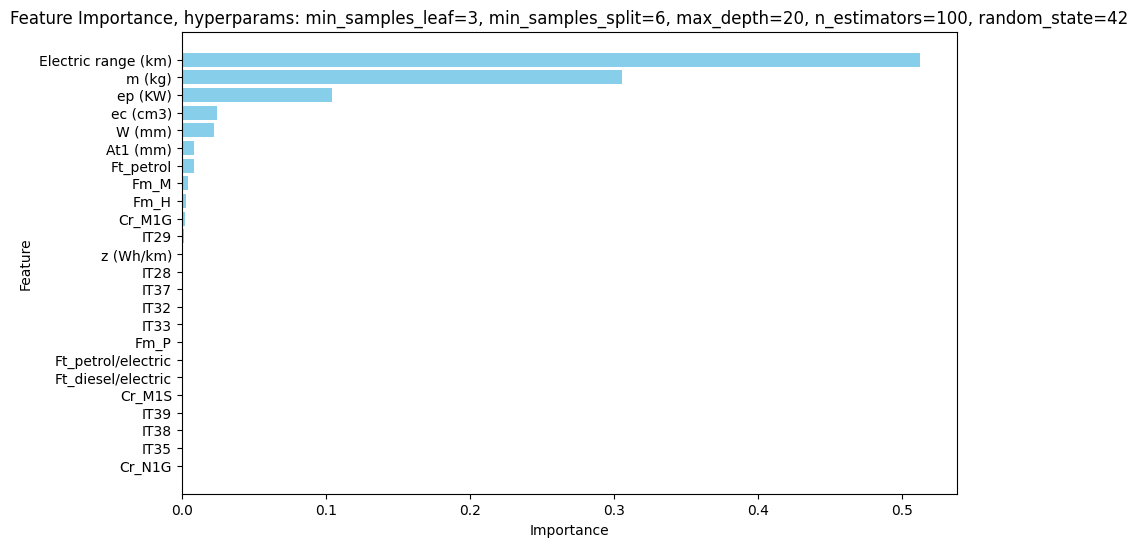

In [5]:
import matplotlib.pyplot as plt

# Extraire l'importance des caractéristiques
feature_importances = model.feature_importances_

# Créer un DataFrame pour afficher les importances avec les noms des colonnes
importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les 10 caractéristiques les plus importantes
print(importance_df.head(10))

# Visualiser les importances des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Inverser l'axe pour afficher les plus importantes en haut
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f"Feature Importance, hyperparams: min_samples_leaf=3, min_samples_split=6, max_depth=20, n_estimators=100, random_state=42")
plt.show()

In [6]:
# Installer SHAP si ce n'est pas déjà fait
# sur windows, ceci peut se faire en powershell (pas dans le notebook), conda activate <my_env>, conda install shap

c:\Users\local\anaconda\envs\DST\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


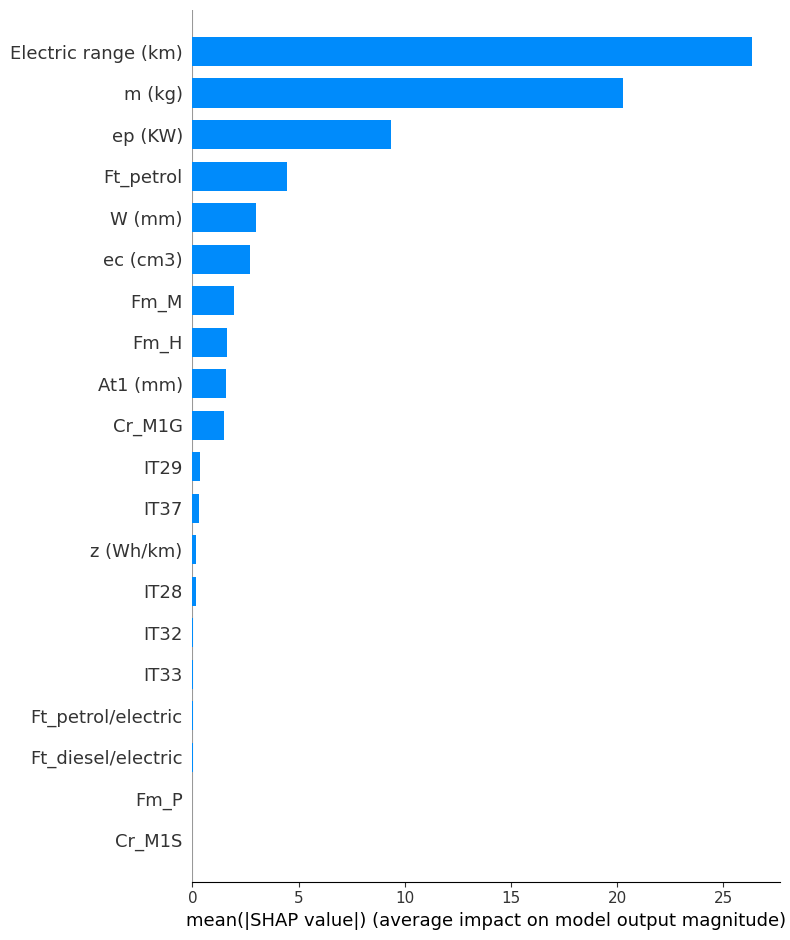

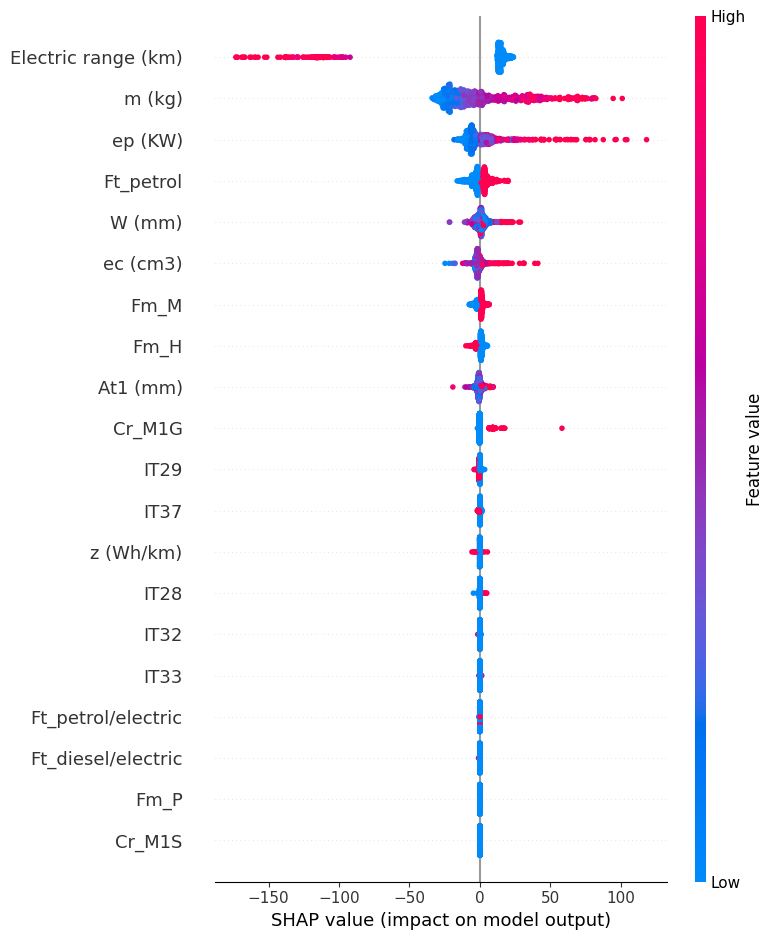

' Code pour TOUTES les lignes (très consommateur en temps)\n# Créer un explainer SHAP pour le modèle Random Forest\nexplainer = shap.TreeExplainer(model)\n\n# Calculer les valeurs SHAP pour le jeu de test\nshap_values = explainer.shap_values(X_test_scaled)\n\n# Résumé global des importances des features\nshap.summary_plot(shap_values, X_test_scaled, plot_type="bar")\n\n# Visualisation détaillée des contributions des features\nshap.summary_plot(shap_values, X_test_scaled)\n'

In [7]:
import shap
# Create a SHAP explainer with optimized tree path perturbation
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled[:1000])  # Using only 100 samples for efficiency

# Global feature importance summary (bar plot)
shap.summary_plot(shap_values, X_test_scaled[:1000], plot_type="bar")

# Detailed contribution visualization
shap.summary_plot(shap_values, X_test_scaled[:1000])

""" Code pour TOUTES les lignes (très consommateur en temps)
# Créer un explainer SHAP pour le modèle Random Forest
explainer = shap.TreeExplainer(model)

# Calculer les valeurs SHAP pour le jeu de test
shap_values = explainer.shap_values(X_test_scaled)

# Résumé global des importances des features
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

# Visualisation détaillée des contributions des features
shap.summary_plot(shap_values, X_test_scaled)
"""

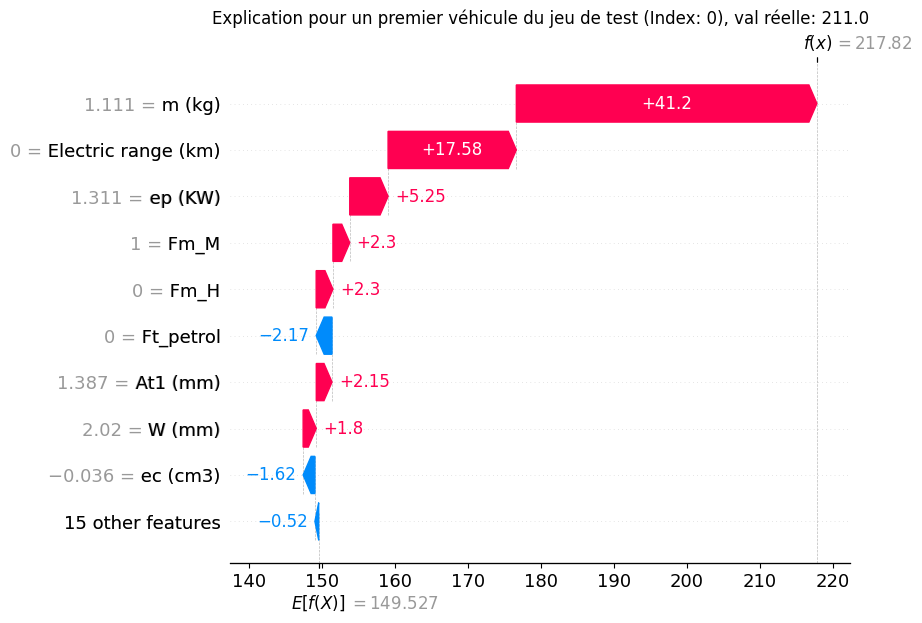

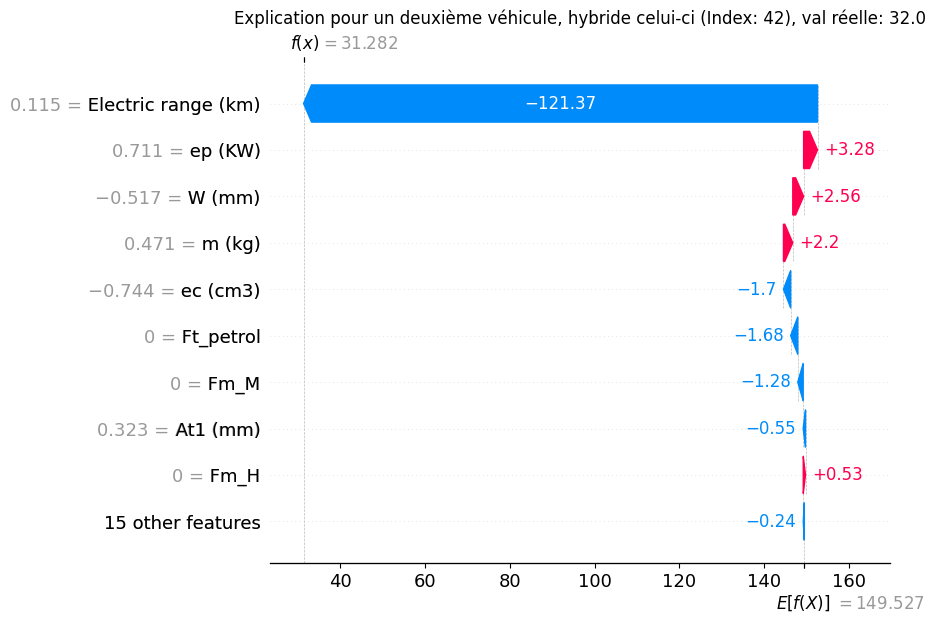

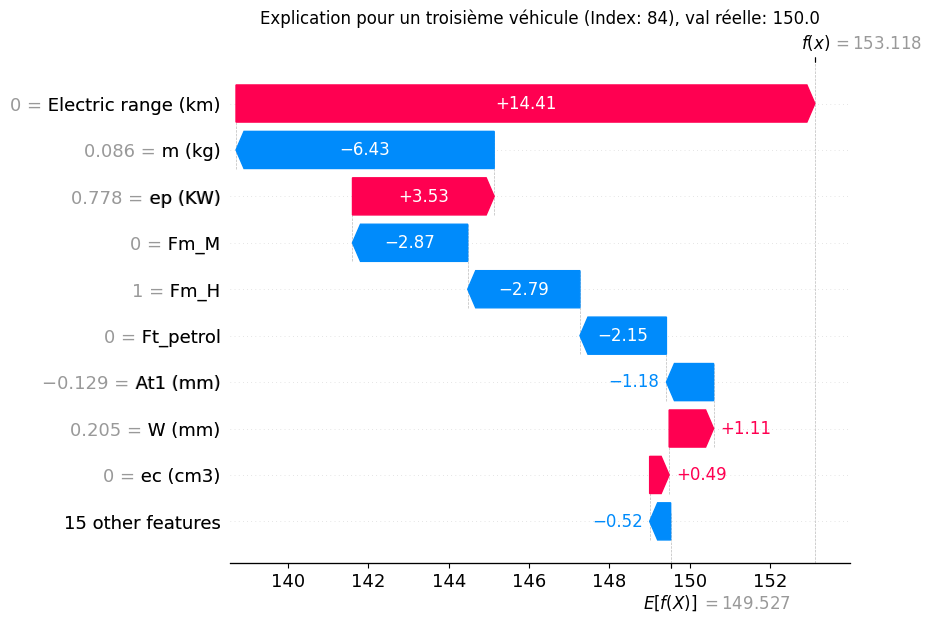

In [15]:
# Obtenons une explication du résultat pour quelques véhicules

# Dictionnaire d'indices à analyser
indices_to_explain = {
    "un premier véhicule du jeu de test": 0,
    "un deuxième véhicule, hybride celui-ci": 42,
    "un troisième véhicule": 84,
}

# Boucle pour générer les graphiques de chaque véhicule
for name, index in indices_to_explain.items():
    
    
    # Extraire la ligne correspondante
    single_instance = X_test_scaled.iloc[[index]]
    
    # Calculer les valeurs SHAP
    shap_values_single = explainer(single_instance)
    
    # Informer avec la valeur réelle de cet échantillon de test
    # Ajouter un point rouge pour la valeur réelle
    vrai_co2=y_test.iloc[index]
    plt.title(f"Explication pour {name} (Index: {index}), val réelle: {vrai_co2}")

    # Afficher le graphique waterfall pour l'explication individuelle
    fig = shap.waterfall_plot(shap_values_single[0])  # Sélectionne le premier résultat si multi-output